# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean? Values of sale products. UNits?¿?. Region-> the place. Channel -> no idea
* Any categorical data to convert? No 
* Any missing data to remove? No 
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


AxesSubplot(0.125,0.125;0.62x0.755)


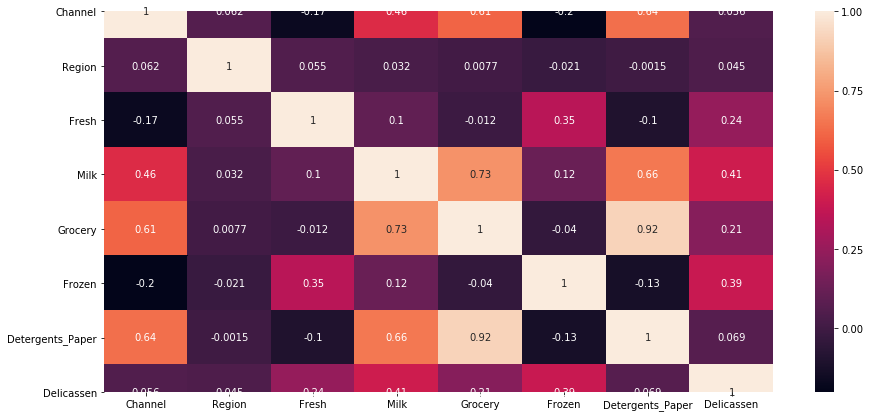

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


In [4]:
# Your observations here
print(customers.shape)
print(customers.isna().sum())
display(customers.describe())
plt.figure(figsize=(15,7))
a= sns.heatmap(customers.corr(), annot = True)
print(a)
plt.show()
print(customers.Channel.value_counts())
print(customers.Region.value_counts())

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [5]:
# Your code here
# Columns Channel and REgion, although they are numeric they are caregorical. We create dummies acordingly. 

customers_dummies = pd.get_dummies(customers,columns = ["Channel", "Region"],  drop_first=True)
customers_dummies.columns
#Values of different features are big and different, we should scale.

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Channel_2', 'Region_2', 'Region_3'],
      dtype='object')

In [6]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']
data = customers[columns]
scaler.fit(data)
customers_scale = scaler.transform(data)
customers_scale = pd.concat([customers_dummies[['Channel_2', 'Region_2', 'Region_3']], pd.DataFrame(customers_scale, columns = columns)],axis = 1, ignore_index=True, sort = False)
customers_scale.columns=['Channel_2', 'Region_2', 'Region_3', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
customers_scale

,Channel_2,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,0,1,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1,0,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1,0,1,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0,0,1,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1,0,1,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...,...
435,0,0,1,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,0,0,1,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1,0,1,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,0,0,1,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [9]:
# Your code here:
from sklearn.cluster import KMeans
X = customers_scale
model_KM = KMeans(n_clusters = 4)
model_KM.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Count the values in `labels`.

In [10]:
# Your code here:
print(len(model_KM.labels_))
print(set(model_KM.labels_))

440
{0, 1, 2, 3}


In [11]:
clusters = model_KM.labels_
customers["Cluster"] = pd.DataFrame(clusters)
print(pd.crosstab(customers.Region,customers.Cluster))
print("\n")
print(pd.crosstab(customers.Channel,customers.Cluster))

Cluster   0    1  2  3
Region                
1        16   59  2  0
2        14   31  1  1
3        81  225  9  1


Cluster    0    1   2  3
Channel                 
1          8  287   1  2
2        103   28  11  0


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
# Your code here
from sklearn.cluster import DBSCAN

model_dbscan=DBSCAN()
model_dbscan.fit(X)
dbscan_labels = model_dbscan.labels_
customers["Cluster_DBSCAN"] = pd.DataFrame(dbscan_labels)
customers.sort_values(by = "Cluster")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Cluster_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
346,2,3,2771,6939,15541,2693,6600,1115,0,-1
343,2,3,1689,6964,26316,1456,15469,37,0,-1
341,2,3,2320,5763,11238,767,5162,2158,0,4
340,2,3,381,4025,9670,388,7271,1371,0,-1
...,...,...,...,...,...,...,...,...,...,...
56,2,3,4098,29892,26866,2616,17740,1340,2,-1
333,2,2,8565,4980,67298,131,38102,1215,2,-1
211,2,1,12119,28326,39694,4736,19410,2870,2,-1
183,1,3,36847,43950,20170,36534,239,47943,3,-1


Count the values in `labels_DBSCAN`.

In [13]:
# Your code here
print(len(dbscan_labels))
print(set(dbscan_labels))

440
{0, 1, 2, 3, 4, 5, 6, 7, -1}


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

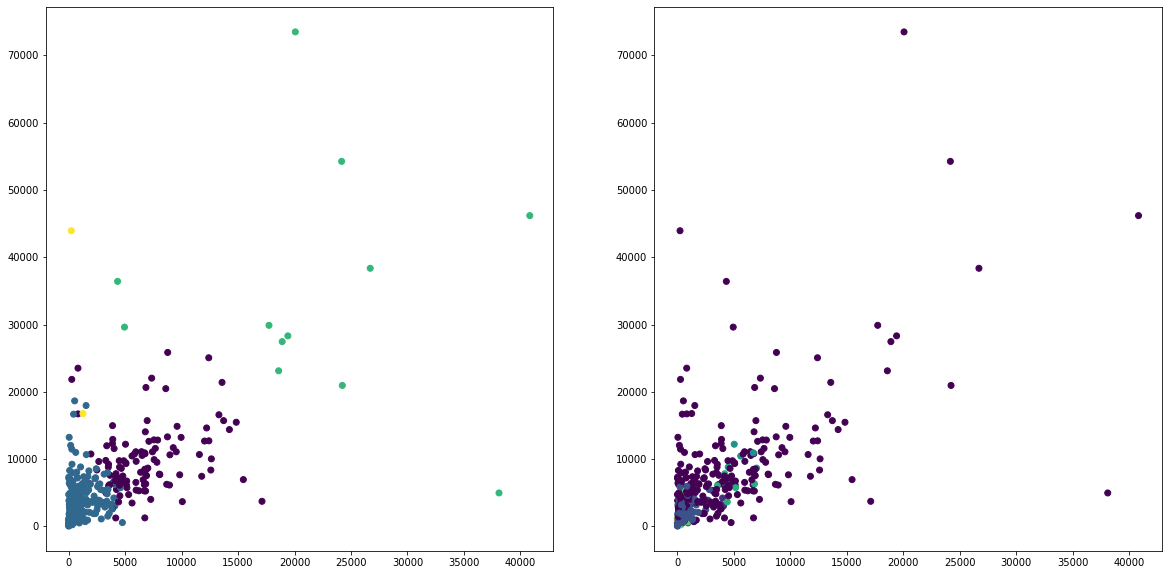

In [14]:
# Your code here:
X = customers.Detergents_Paper
y = customers.Milk

fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].scatter(X, y, c = customers["Cluster"])
ax[1].scatter(X, y, c = customers["Cluster_DBSCAN"])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

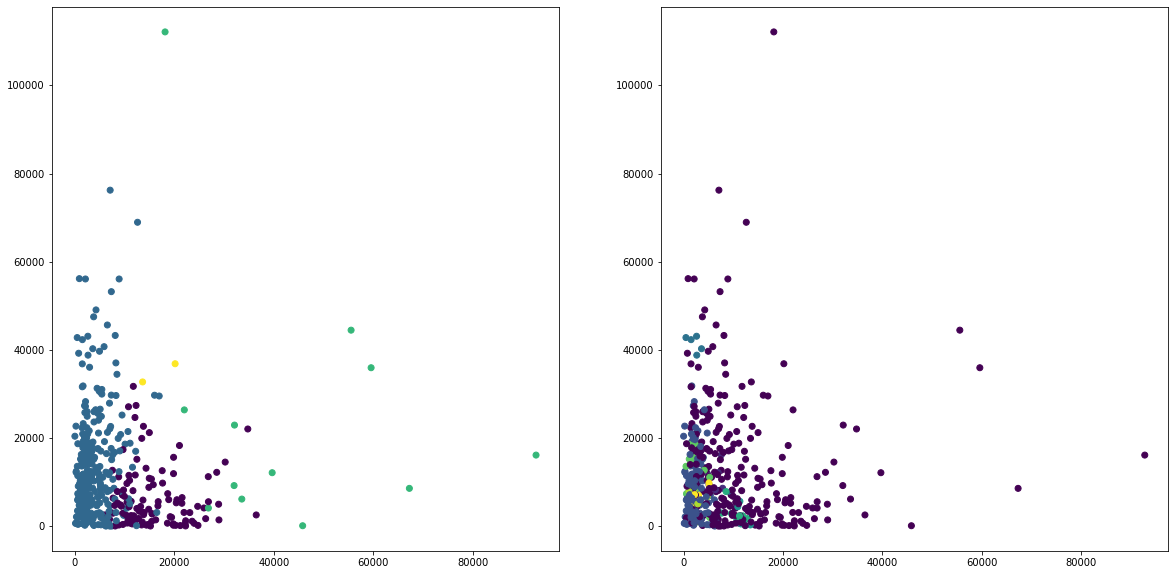

In [15]:
# Your code here:
# Your code here:
X = customers.Grocery
y = customers.Fresh

fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].scatter(X, y, c = customers["Cluster"])
ax[1].scatter(X, y, c = customers["Cluster_DBSCAN"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

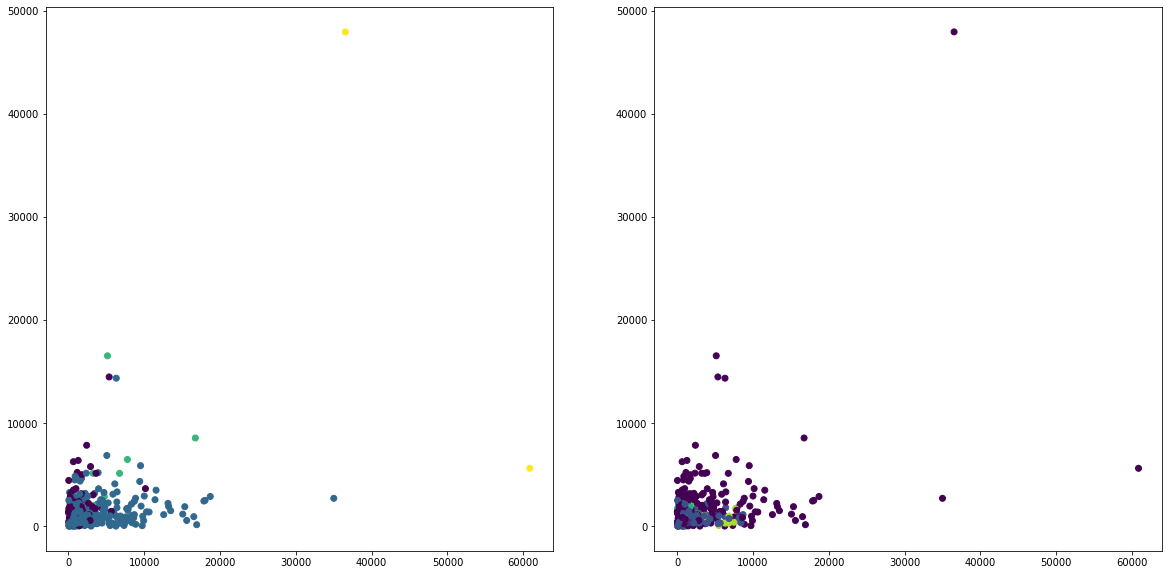

In [16]:
# Your code here:
X = customers.Frozen
y = customers.Delicassen

fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
ax[0].scatter(X, y, c = customers["Cluster"])
ax[1].scatter(X, y, c = customers["Cluster_DBSCAN"])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [18]:
# Your code here:
customers.groupby(["Cluster","Cluster_DBSCAN"]).mean()

Channel    Region         Fresh          Milk  \
Cluster Cluster_DBSCAN                                                   
0       -1              1.919192  2.535354   6788.101010  10160.151515   
         3              2.000000  3.000000   2357.200000  10224.800000   
         4              2.000000  3.000000   3068.142857   6095.857143   
1       -1              1.161972  2.380282  17332.957746   4591.880282   
         0              2.000000  3.000000  11401.000000   3536.200000   
         1              1.000000  3.000000   9128.823077   1862.438462   
         2              1.000000  3.000000  41446.600000   1421.200000   
         5              1.000000  1.000000   9837.863636   1751.863636   
         6              1.000000  1.000000   6823.000000   1943.000000   
         7              1.000000  2.000000   7494.600000   1537.600000   
2       -1              1.916667  2.583333  24847.750000  34427.916667   
3       -1              1.000000  2.500000  34782.000000  30367.000000   

                             Grocery        Frozen  Detergents_Paper  \
Cluster Cluster_DBSCAN                                                 
0       -1              16158.555556   1511.404040       6945.828283   
         3              11862.800000    609.600000       5780.000000   
         4              10355.000000    994.000000       4675.571429   
1       -1               5418.901408   4705.978873       1153.514085   
         0               6729.000000    720.200000       3561.000000   
         1               2423.530769   2131.430769        496.576923   
         2               2167.600000   1276.400000        416.200000   
         5               2161.681818   1513.181818        333.954545   
         6               2372.666667   6780.333333        386.500000   
         7               3383.000000   2575.400000        227.400000   
2       -1              43794.666667   4370.416667      21503.083333   
3       -1              16898.000000  48701.500000        755.500000   

                          Delicassen  
Cluster Cluster_DBSCAN                
0       -1               1774.595960  
         3                572.800000  
         4               1826.428571  
1       -1               1737.901408  
         0                258.200000  
         1                741.946154  
         2                784.800000  
         5                669.045455  
         6                613.666667  
         7                941.000000  
2       -1               4541.750000  
3       -1              26776.000000

Which algorithm appears to perform better?

In [19]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

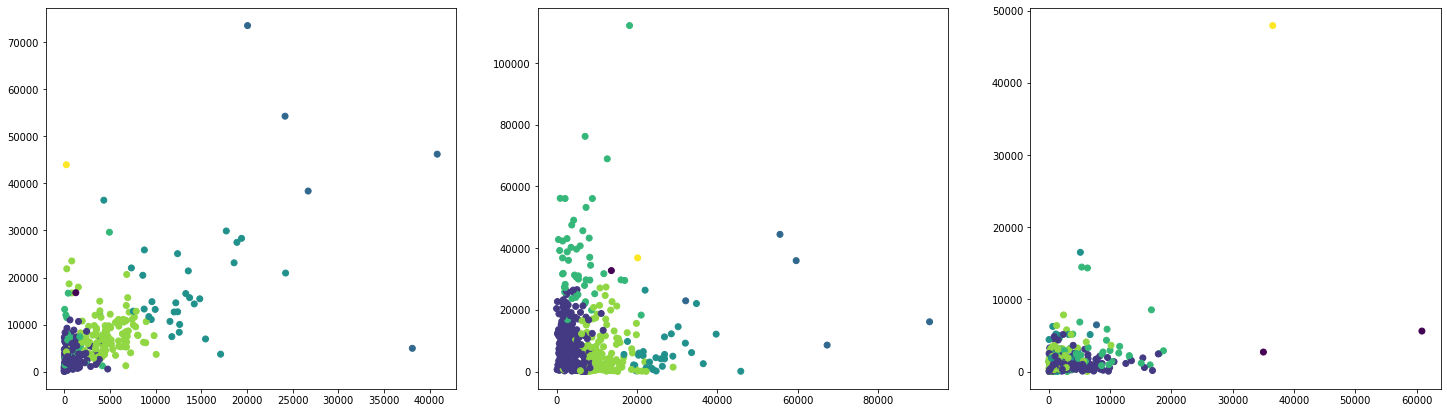

In [46]:
X = customers_scale
model_KM = KMeans(n_clusters = 7)
model_KM.fit(X)
customers["Cluster"] = pd.DataFrame(model_KM.labels_)
X = customers.Detergents_Paper
y = customers.Milk

print()

fig, ax = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(25)
ax[0].scatter(X, y, c = customers["Cluster"])
X = customers.Grocery
y = customers.Fresh
ax[1].scatter(X, y, c = customers["Cluster"])
X = customers.Frozen
y = customers.Delicassen
ax[2].scatter(X, y, c = customers["Cluster"])
plt.show()

In [21]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

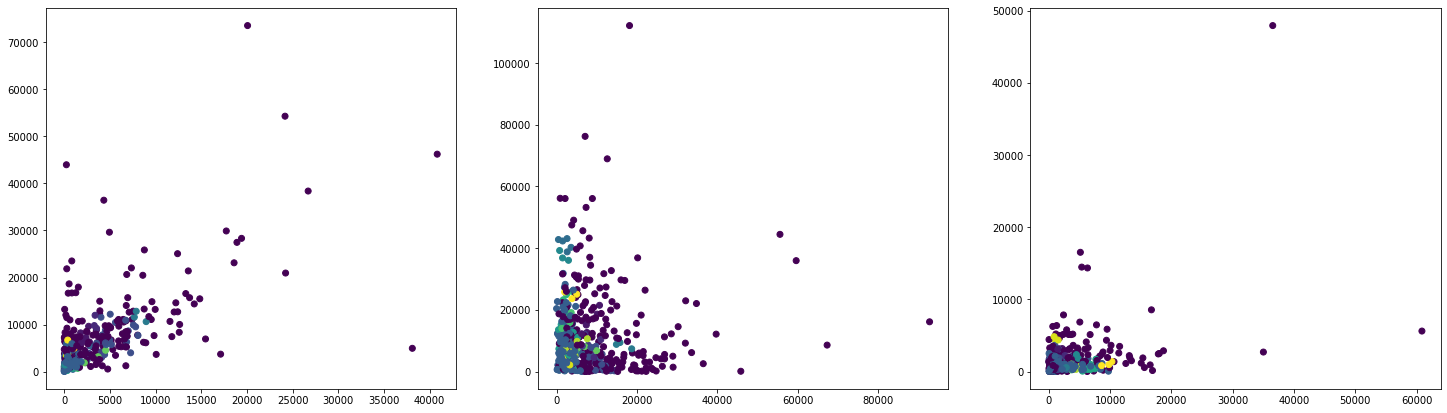

In [48]:
# Your code here
X = customers_scale
model_dbscan=DBSCAN(eps = 0.5, min_samples = 3)
model_dbscan.fit(X)
customers["Cluster_DBSCAN"] = pd.DataFrame(model_dbscan.labels_)
X = customers.Detergents_Paper
y = customers.Milk

print()

fig, ax = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(25)
ax[0].scatter(X, y, c = customers["Cluster_DBSCAN"])
X = customers.Grocery
y = customers.Fresh
ax[1].scatter(X, y, c = customers["Cluster_DBSCAN"])
X = customers.Frozen
y = customers.Delicassen
ax[2].scatter(X, y, c = customers["Cluster_DBSCAN"])
plt.show()

In [23]:
# Your comment here